In [1]:
import sys; sys.path.insert(0, '/home/j/jwoo/my_python/lib/python3.11/site-packages/')
import cellhint

/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/uma

In [2]:
import scanpy as sc

In [4]:
adata = sc.read('/ceph/project/holab/jwoo/IPF_HT/Integration/Adam_Haberman_Reyfman_HO_Integration/Adams_Haberman_Reyfman_HO_Morse_Integration/CommonGenes/merged_v4.h5ad')
adata

AnnData object with n_obs × n_vars = 73634 × 19349
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Total', 'LogProb', 'PValue', 'Limited', 'FDR', 'percent.mito', 'percent.rp', 'Subject_Identity', 'Library_Identity', 'barcode', 'original_barcode', 'orig.ident.y', 'nCount_RNA.y', 'nFeature_RNA.y', 'CellBarcode_Identity', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'RNA_snn_res.0.7', 'seurat_clusters', 'Filt', 'Donor', 'CellType_v2', 'Data', 'old_cluster', 'RNA_snn_res.0.8', 'Celltype_Original', 'RNA_snn_res.1', 'RNA_snn_res.0.6', 'Disease', 'Disease2', 'Type', 'CellType', 'RNA_snn_res.1.2', 'Library', 'bc', 'Diagnosis', 'Sample_Name', 'Sample_Source', 'Status', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'population', 'celltype', 'Tissue', 'Sex', 'Sample', 'Cluster', 'label', 'nCount_HTO', 'nFeature_HTO', 'Celltype', 'Group', 'nCount_SoupX', 'nFeature_SoupX', 'nCount_SoupXM', 'nFeature_SoupXM', 'TCell_cluster', 'TCell_l

In [5]:
adata.obs.Data.value_counts()

Data
Morse       15000
Reyfman     14973
Adams       14932
Haberman    14864
HO          13865
Name: count, dtype: int64

In [6]:
adata = adata.raw.to_adata()

In [7]:
del adata.var
del adata.uns

adata

AnnData object with n_obs × n_vars = 73634 × 19349
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Total', 'LogProb', 'PValue', 'Limited', 'FDR', 'percent.mito', 'percent.rp', 'Subject_Identity', 'Library_Identity', 'barcode', 'original_barcode', 'orig.ident.y', 'nCount_RNA.y', 'nFeature_RNA.y', 'CellBarcode_Identity', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'RNA_snn_res.0.7', 'seurat_clusters', 'Filt', 'Donor', 'CellType_v2', 'Data', 'old_cluster', 'RNA_snn_res.0.8', 'Celltype_Original', 'RNA_snn_res.1', 'RNA_snn_res.0.6', 'Disease', 'Disease2', 'Type', 'CellType', 'RNA_snn_res.1.2', 'Library', 'bc', 'Diagnosis', 'Sample_Name', 'Sample_Source', 'Status', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'population', 'celltype', 'Tissue', 'Sex', 'Sample', 'Cluster', 'label', 'nCount_HTO', 'nFeature_HTO', 'Celltype', 'Group', 'nCount_SoupX', 'nFeature_SoupX', 'nCount_SoupXM', 'nFeature_SoupXM', 'TCell_cluster', 'TCell_l

In [8]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, batch_key = 'Data', subset = True)
sc.pp.scale(adata, max_value = 10)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

... storing 'orig.ident' as categorical
... storing 'Subject_Identity' as categorical
... storing 'Library_Identity' as categorical
... storing 'barcode' as categorical
... storing 'original_barcode' as categorical
... storing 'orig.ident.y' as categorical
... storing 'CellBarcode_Identity' as categorical
... storing 'CellType_Category' as categorical
... storing 'Manuscript_Identity' as categorical
... storing 'Subclass_Cell_Identity' as categorical
... storing 'Disease_Identity' as categorical
... storing 'Donor' as categorical
... storing 'CellType_v2' as categorical
... storing 'Data' as categorical
... storing 'old_cluster' as categorical
... storing 'RNA_snn_res.0.8' as categorical
... storing 'Celltype_Original' as categorical
... storing 'RNA_snn_res.1' as categorical
... storing 'Disease' as categorical
... storing 'Disease2' as categorical
... storing 'Type' as categorical
... storing 'CellType' as categorical
... storing 'RNA_snn_res.1.2' as categorical
... storing 'Library'

In [ ]:
sc.pl.umap(adata, color = ['Data'])

In [9]:
adata

AnnData object with n_obs × n_vars = 73634 × 1408
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Total', 'LogProb', 'PValue', 'Limited', 'FDR', 'percent.mito', 'percent.rp', 'Subject_Identity', 'Library_Identity', 'barcode', 'original_barcode', 'orig.ident.y', 'nCount_RNA.y', 'nFeature_RNA.y', 'CellBarcode_Identity', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'RNA_snn_res.0.7', 'seurat_clusters', 'Filt', 'Donor', 'CellType_v2', 'Data', 'old_cluster', 'RNA_snn_res.0.8', 'Celltype_Original', 'RNA_snn_res.1', 'RNA_snn_res.0.6', 'Disease', 'Disease2', 'Type', 'CellType', 'RNA_snn_res.1.2', 'Library', 'bc', 'Diagnosis', 'Sample_Name', 'Sample_Source', 'Status', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'population', 'celltype', 'Tissue', 'Sex', 'Sample', 'Cluster', 'label', 'nCount_HTO', 'nFeature_HTO', 'Celltype', 'Group', 'nCount_SoupX', 'nFeature_SoupX', 'nCount_SoupXM', 'nFeature_SoupXM', 'TCell_cluster', 'TCell_la

In [10]:
alignment = cellhint.harmonize(adata, 'Data_AHM','CellType_Integrated_AHM_Public_v4',use_rep='X_harmony')

🏆 Reordering datasets
🖇 Harmonizing cell types of HO and Integrated
🖇 Harmonizing cell types of Morse
🖋️ Reannotating cells
✅ Harmonization done!


In [11]:
alignment

Cross-dataset cell type alignment for 3 datasets
    base_distance: a cross-dataset distance object
    aligned_datasets: 'HO', 'Integrated', 'Morse'
    relation: data frame of the harmonization table
    reannotation: data frame of the reannotated cells ('dataset', 'cell_type', 'reannotation', 'group')

In [12]:
alignment.write('/ceph/project/holab/jwoo/IPF_HT/Integration/Adam_Haberman_Reyfman_HO_Integration/Adams_Haberman_Reyfman_HO_Morse_Integration/CommonGenes/CellHint_alignment_Ho_Morse_Integrated.pkl')

In [13]:
# Note - `alignment.relation` is simply a Pandas data frame.
# Show the top 10 rows of the table.
alignment.relation.head(20)

,HO,relation,Integrated,relation,Morse
0,NONE,=,Mac_Lymph doublets,=,NONE
0,CD9+/FN1/CD206 Hi AMs,=,CD206hi FN1hi AM,=,CD206hi FN1hi AM
1,CMonos,=,cMono,=,cMonos
2,Cycling AM_2,=,Cycling Macs,=,Cycling mac
3,FABP4 AMs,=,FABP4hi AM,=,FABP4hi AM
4,NCMonos,=,ncMono,=,ncMonos
5,NONE,=,HSP+ Mac,=,HSP macs
6,SPP1+ AMs,∋,MonoMac,=,Mac UD (transitional mono-mac)
0,UNRESOLVED,=,SPP1+ Mac,=,SPP1 hi macs
0,SPP1+ AMs,∋,IM,∋,IM


In [14]:
alignment.groups

array(['Group1', 'Group2', 'Group3', 'Group4', 'Group5', 'Group6',
       'Group7', 'Group8', 'Group9', 'Group8', 'Group8', 'Group10',
       'Group10', 'Group11', 'Group11', 'Group12', 'Group12', 'Group13',
       'Group13', 'Group14', 'Group15', 'Group16', 'Group17', 'Group18',
       'Group19'], dtype=object)

In [15]:
alignment.reannotation

,dataset,cell_type,reannotation,group
ID,,,,
AAACCTGTCAACACCA-1_1_1,Integrated,FABP4hi AM,FABP4 AMs = FABP4hi AM = FABP4hi AM,Group5
AAATGCCGTGGCGAAT-1_1_1,Integrated,cDC2,DCs ∋ cDC2 ∈ DCs,Group11
AACACGTTCGGTCTAA-1_1_1,Integrated,Cycling Macs,Cycling AM_2 = Cycling Macs = Cycling mac,Group4
AAGCCGCCAAATACAG-1_1_1,Integrated,IM,SPP1+ AMs ∋ IM ∋ SPP1 mid macs,Group8
AAGGCAGAGCCAGGAT-1_1_1,Integrated,cMono,CMonos = cMono = cMonos,Group3
...,...,...,...,...
TTGGCAACAGATCGGA-1_16_5,Morse,ncMonos,NCMonos = ncMono = ncMonos,Group6
TTGGCAAGTCATGCAT-1_16_5,Morse,Mac UD (transitional mono-mac),SPP1+ AMs ∋ MonoMac = Mac UD (transitional mon...,Group8
TTGTAGGCATGCCACG-1_16_5,Morse,SPP1 mid macs,SPP1+ AMs ∋ IM ∋ SPP1 mid macs,Group8


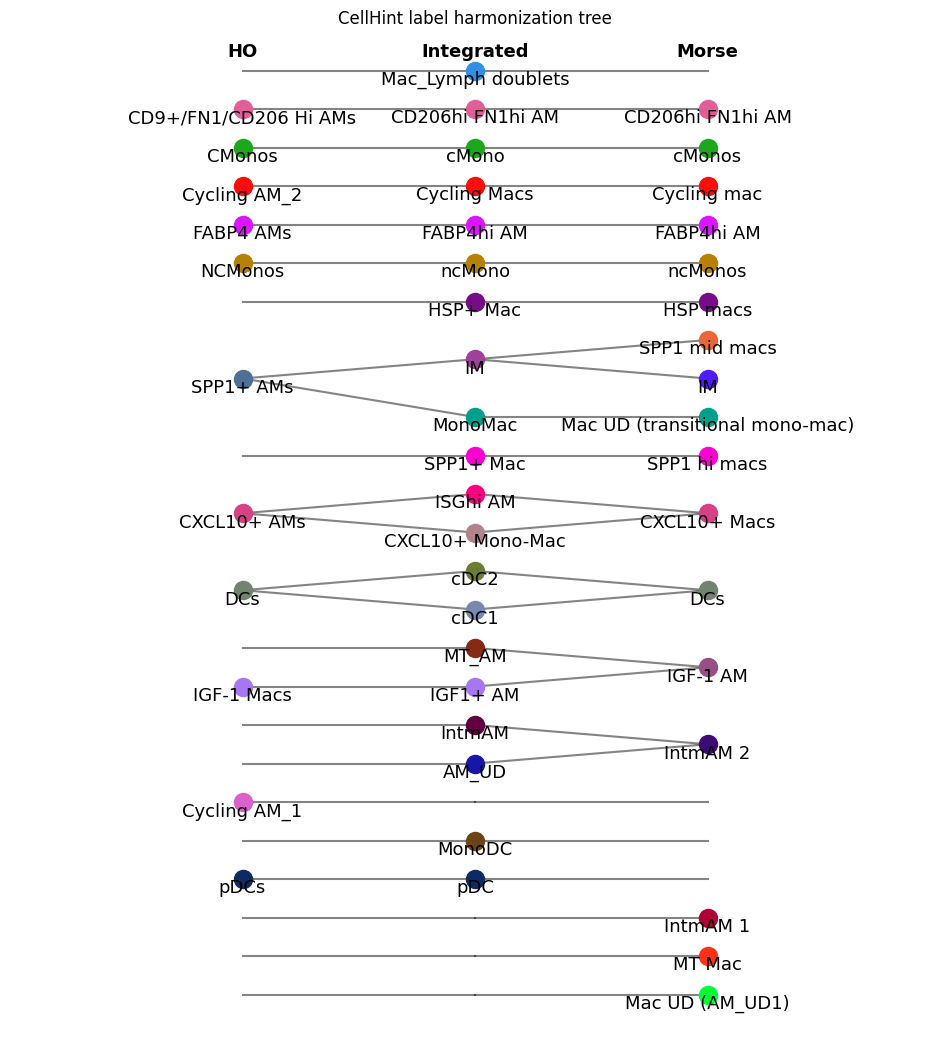

In [16]:
cellhint.treeplot(alignment,node_size="13",label_size="13",figsize=(12,13),save="/ceph/project/holab/jwoo/IPF_HT/Integration/Adam_Haberman_Reyfman_HO_Integration/Adams_Haberman_Reyfman_HO_Morse_Integration/CommonGenes/CellHint_TreeFigure_HO_Morse_Integrated_3.pdf")

In [ ]:
cellhint.treeplot(alignment,order_dataset = True)

In [ ]:
member_mat = alignment.base_distance.to_meta(turn_binary = True)
member_mat.iloc[:5, :5]

In [ ]:
import seaborn as sns

sns.clustermap(member_mat)

In [ ]:
flag = member_mat.index.str.contains('CXCL10|SPP1|FABP4')
sns.clustermap(member_mat.loc[flag,flag])



In [ ]:
flag = member_mat.index.str.contains('AM|Mac')
sns.clustermap(member_mat.loc[flag,flag])

In [ ]:
alignment.base_distance

In [ ]:
alignment.base_distance.assignment

In [ ]:
alignment.best_align(dataset_order = ['HO', 'Adams', 'Morse', 'Haberman', 'Reyfman'])

In [ ]:
alignment.relation.head(10)

In [ ]:
alignment.reannotate()

In [ ]:
cellhint.treeplot(alignment)

In [ ]:
member_mat = alignment.base_distance.to_meta(turn_binary = True)
member_mat.iloc[:5, :5]

In [ ]:
import seaborn as sns

sns.clustermap(member_mat)

In [ ]:
dist_mat = alignment.base_distance.to_meta()
dist_mat.iloc[:5, :5]

In [ ]:

sns.clustermap(dist_mat)